<a href="https://colab.research.google.com/github/klimereo/ITProject-Musical-Complexity/blob/main/IT_Project_Plotifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting functions

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import pandas as pd
import random
import numpy as np

In [25]:
def plot_data(dataframe):
    sns.set_theme(style="whitegrid")
    unique_periods = dataframe['period'].unique()
    patches = [Patch(color=sns.color_palette()[i], label=period.title()) for i, period in enumerate(unique_periods)]
    for i, col in enumerate(dataframe[['entropy over notes', 'entropy over chords', 'condentropy over chords', 'summed simple entropies']]):
        plt.figure(i)
        ax = sns.boxplot(x='period', y=col, data=dataframe)
        plt.legend(handles=patches, bbox_to_anchor=(1, 1), loc='upper left')
        plt.setp(ax.get_xticklabels(), visible=False)
        ax.set_xlabel('Period')
        ax.set_ylabel('Entropy')
        plt.title('')
        plt.savefig(f'{col}.png', dpi=500, bbox_inches='tight')
    plt.show()

In [29]:
def plot_data_pieces(dataframe, column_name):
  sns.scatterplot(x='piece name', y= column_name, data=results, hue='period', style='period', s=55)
  plt.xticks(rotation=90, fontsize=7)
  plt.xlabel('Pieces')
  plt.ylabel('Entropy')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.savefig(f'{column_name}piecewise.png', dpi=500, bbox_inches='tight')
  plt.show()


# Reading & Preprocessing files

In [5]:
results = pd.read_excel('/content/totalised.xlsx')

In [6]:
results.dtypes

piece name                  object
entropy over notes         float64
entropy over chords        float64
condentropy over chords    float64
period                      object
dtype: object

In [7]:
results.head()

,piece name,entropy over notes,entropy over chords,condentropy over chords,period
0,Bach 847,5.5069,7.9522,260.3016,baroque
1,Bach Goldberg,5.6204,7.3151,260.2332,baroque
2,Haydn 50,6.3287,7.6342,433.0571,baroque
3,Mozart Turca,5.9984,6.5878,180.2051,baroque
4,Chopin Waltz,7.4320,7.0981,303.3302,romantic


In [8]:
results['summed simple entropies'] = results.apply(lambda row: row['entropy over notes'] + row['entropy over chords'], axis=1)

In [9]:
results['period'] = results['period'].replace('baroque', 'baroque/classical')

In [10]:
results.head()

,piece name,entropy over notes,entropy over chords,condentropy over chords,period,summed simple entropies
0,Bach 847,5.5069,7.9522,260.3016,baroque/classical,13.4591
1,Bach Goldberg,5.6204,7.3151,260.2332,baroque/classical,12.9355
2,Haydn 50,6.3287,7.6342,433.0571,baroque/classical,13.9629
3,Mozart Turca,5.9984,6.5878,180.2051,baroque/classical,12.5862
4,Chopin Waltz,7.4320,7.0981,303.3302,romantic,14.5301


# Plotting

## Period-wise

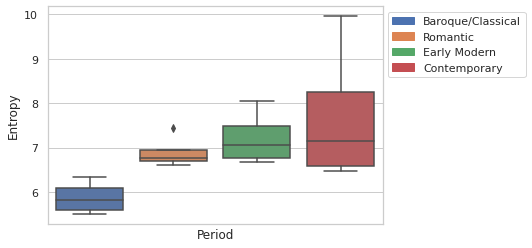

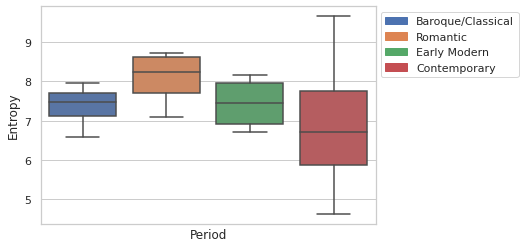

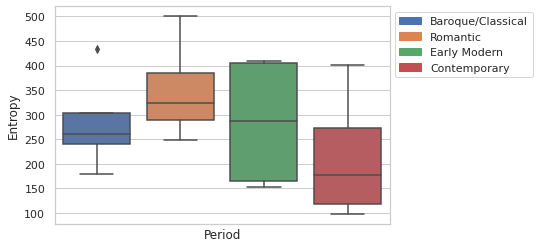

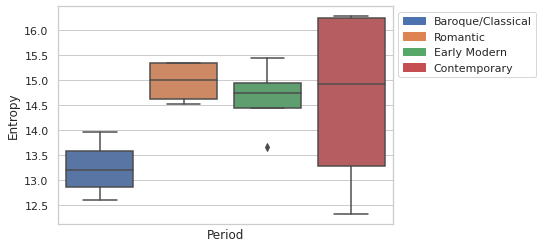

In [26]:
plot_data(results)

## Piecewise

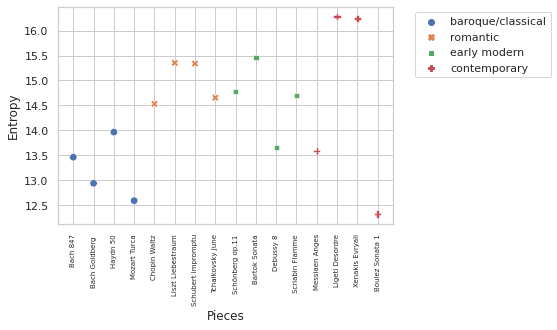

In [30]:
plot_data_pieces(results, 'summed simple entropies')

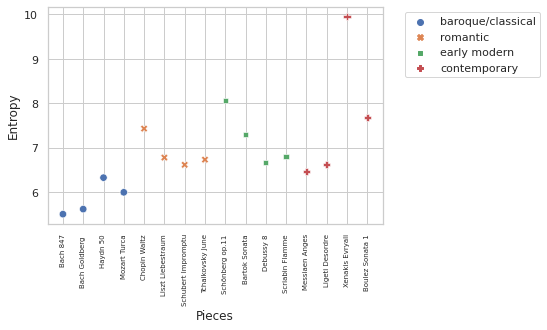

In [31]:
plot_data_pieces(results, 'entropy over notes')

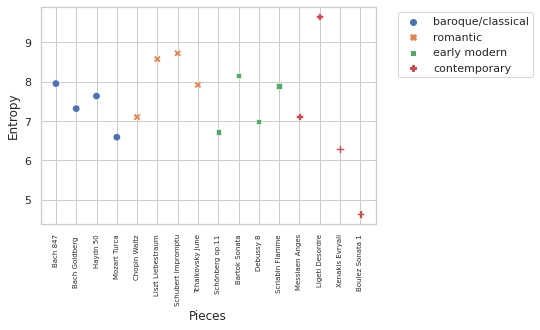

In [32]:
plot_data_pieces(results, 'entropy over chords')

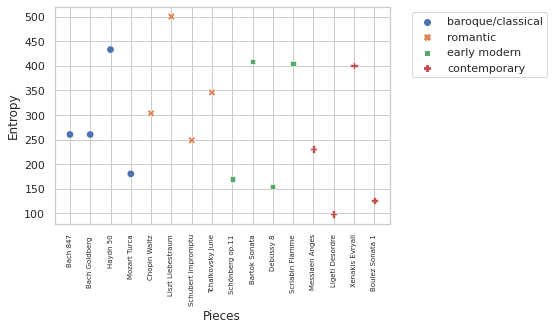

In [33]:
plot_data_pieces(results, 'condentropy over chords')

In [34]:
results

,piece name,entropy over notes,entropy over chords,condentropy over chords,period,summed simple entropies
0,Bach 847,5.5069,7.9522,260.3016,baroque/classical,13.4591
1,Bach Goldberg,5.6204,7.3151,260.2332,baroque/classical,12.9355
2,Haydn 50,6.3287,7.6342,433.0571,baroque/classical,13.9629
3,Mozart Turca,5.9984,6.5878,180.2051,baroque/classical,12.5862
4,Chopin Waltz,7.4320,7.0981,303.3302,romantic,14.5301
5,Liszt Liebestraum,6.7803,8.5732,500.3907,romantic,15.3535
6,Schubert Impromptu,6.6175,8.7216,248.4414,romantic,15.3391
7,Tchaikovsky June,6.7335,7.9202,345.8928,romantic,14.6537
8,Schönberg op.11,8.0583,6.7226,169.6309,early modern,14.7809
9,Bartok Sonata,7.2981,8.1563,408.4436,early modern,15.4544


In [24]:
results.describe()

,entropy over notes,entropy over chords,condentropy over chords,summed simple entropies
count,16.000000,16.000000,16.000000,16.000000
mean,6.911294,7.453638,282.770919,14.364931
std,1.061262,1.154052,121.834512,1.217534
min,5.506900,4.630600,98.154700,12.315100
25%,6.432125,6.923375,177.561550,13.554275
50%,6.698750,7.474650,260.267400,14.591900
75%,7.331575,8.003225,401.763200,15.342700
max,9.954900,9.657600,500.390700,16.285400
